In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import skimage as sk
import scipy as sp
import cv2 as cv
import os
import tensorflow as tf
print(tf.__version__)
#tf.config.set_visible_devices([], 'GPU')

2.13.0


In [2]:
images = os.listdir("./input")

images = [os.path.splitext(images_num)[0] for images_num in images]
images.sort()
images.pop(0)

images = np.array(images, dtype = int)
images.sort()

images

array([   1,    2,    3, ..., 2685, 2686, 2687])

In [3]:
data_set = np.zeros((len(images),256,256,3))
data_set.shape

for i in range(len(images)) :
    data_set[i-1,:,:,:] = sk.io.imread("./input/"+str(images[i-1])+".jpg") / 255
    
print("Shape of the entry images (number, height, width, channels): ", data_set.shape)

Shape of the entry images (number, height, width, channels):  (2687, 256, 256, 3)


In [4]:
class_names = ["ocean & sea", "forest", "road", "building", "mountains"]

label_set = np.zeros(len(images))

data_train = np.zeros((1352,256,256,3))
label_train = np.zeros(1352)


data_test = np.zeros((281,256,256,3))
label_test = np.zeros(281)


data_train[0:300,:,:,:] = data_set[:300,:,:,:]
label_train[0:300] = 0
label_train[140] = 1


data_test[0:58,:,:,:] = data_set[300:358,:,:,:]
label_test[0:58] = 0


data_train[300:541,:,:,:] = data_set[359:600,:,:,:]
data_test[58:143,:,:,:] = data_set[601:686,:,:,:]
label_train[300:541] = 1
label_test[58:143] = 1


data_train[541:754,:,:,:] = data_set[687:900,:,:,:]
data_test[143:188,:,:,:] = data_set[901:946,:,:,:]
label_train[541:754] = 2
label_test[143:188] = 2


data_train[754:1007,:,:,:] = data_set[947:1200,:,:,:]
data_test[188:241,:,:,:] = data_set[1201:1254,:,:,:]
label_train[754:1007] = 3
label_test[188:241] = 3


data_train[1007:1352,:,:,:] = data_set[1255:1600,:,:,:]
data_test[241:281,:,:,:] = data_set[1601:1641,:,:,:]
label_train[1007:1352] = 4
label_test[241:281] = 4

label_test = label_test.astype(int)
label_train = label_train.astype(int)


In [5]:
for i in range(len(data_train)):
    if np.max(data_train[i,:,:,:]) == 0 :
       print(i)

for i in range(len(data_test)):
    if np.max(data_test[i,:,:,:]) == 0 :
       print(i)

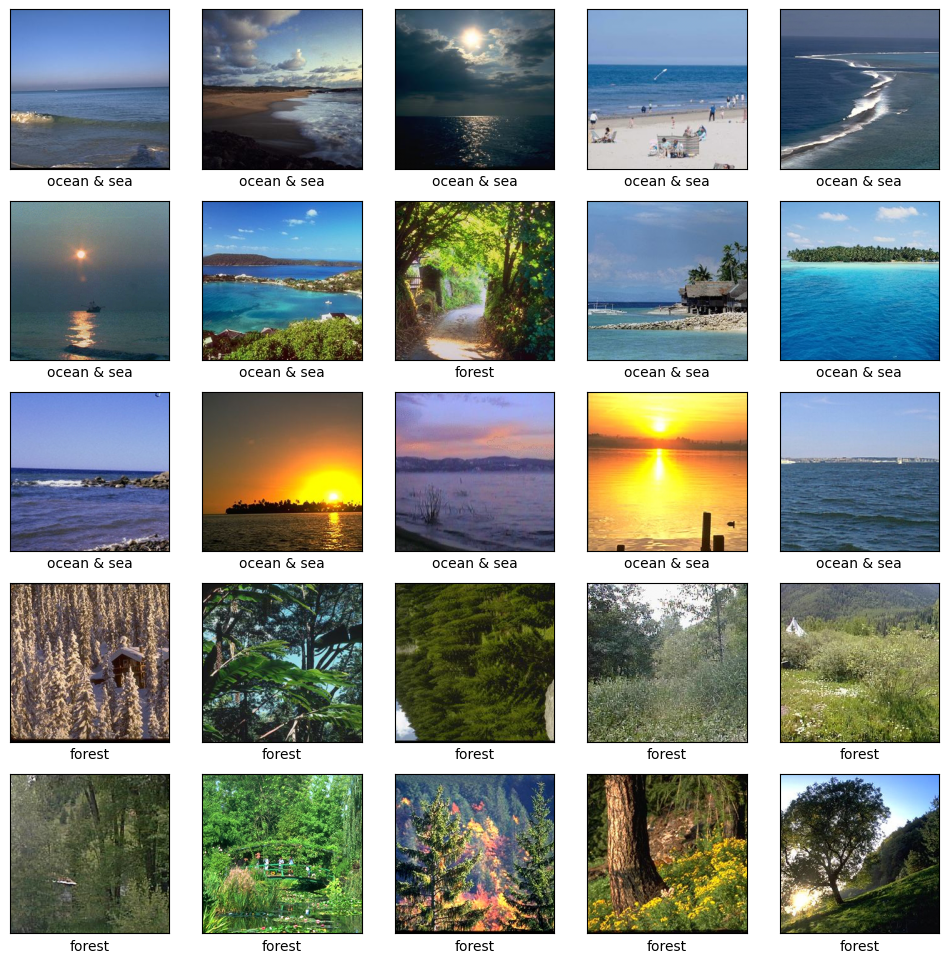

In [6]:
plt.figure(figsize = (12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(data_train[20*i,:,:,:])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[label_train[20*i]])

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, 5, activation="relu", padding="same", input_shape=[256, 256, 3]),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    tf.keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(512, 3, activation="relu", padding="same"),
    tf.keras.layers.Conv2D(512, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(1024, 3, activation="relu", padding="same"),
    tf.keras.layers.Conv2D(1024, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10)
])
"""
tf.keras.layers.Conv2D(512, 3, activation="relu", padding="same"),
    tf.keras.layers.Conv2D(512, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(1024, 3, activation="relu", padding="same"),
    tf.keras.layers.Conv2D(1024, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(2),
"""

2024-01-22 08:36:13.053672: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-01-22 08:36:13.053787: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-01-22 08:36:13.053818: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-01-22 08:36:13.054391: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-22 08:36:13.054766: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


'\ntf.keras.layers.Conv2D(512, 3, activation="relu", padding="same"),\n    tf.keras.layers.Conv2D(512, 3, activation="relu", padding="same"),\n    tf.keras.layers.MaxPooling2D(2),\n    tf.keras.layers.Conv2D(1024, 3, activation="relu", padding="same"),\n    tf.keras.layers.Conv2D(1024, 3, activation="relu", padding="same"),\n    tf.keras.layers.MaxPooling2D(2),\n'

In [8]:
model.compile(optimizer = 'sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [9]:
hist = model.fit(data_train, label_train, epochs=20,
                validation_data = (data_test, label_test))

Epoch 1/20


2024-01-22 08:36:16.251914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - ETA: 0s - loss: 2.2019 - accuracy: 0.2256

2024-01-22 08:36:55.076132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - 41s 949ms/step - loss: 2.2019 - accuracy: 0.2256 - val_loss: 2.0490 - val_accuracy: 0.1423
Epoch 2/20
17/43 [==========>...................] - ETA: 23s - loss: 1.9939 - accuracy: 0.2298

KeyboardInterrupt: 

In [ ]:
pd.DataFrame(hist.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()
